In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow.keras
from keras.layers import Dense
from keras.models import Sequential
from keras import regularizers
encoding_dim=32 # Reduced dimension of the original input
input_img=keras.Input(shape=(784,)) #Shape of the input

encoded=Dense(encoded_dim,activation="relu",activity_regularizer=regularizers.l1(10e-5))(input_img) #Encoder
decoded=Dense(784,activation="sigmoid")(encoded) #Decoder

ModuleNotFoundError: No module named 'keras'

In [3]:
encoder = keras.Model(input_img, encoded)
# Model for decoding the input img
autoencoder=keras.Model(input_img,decoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

NameError: name 'keras' is not defined

In [28]:
autoencoder.compile(loss="binary_crossentropy",optimizer="adam")

In [29]:
from keras.datasets import mnist
import numpy as np
(x_train,_),(x_test,_)=mnist.load_data()

In [30]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [31]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2797 - val_loss: 0.1960
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1782 - val_loss: 0.1614
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1528 - val_loss: 0.1429
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1381 - val_loss: 0.1312
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1285 - val_loss: 0.1236
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1221 - val_loss: 0.1183
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1175 - val_loss: 0.1142
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1140 - val_loss: 0.1112
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1113 - val_loss: 0.1089
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1094 - val_loss: 0.107

In [32]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)

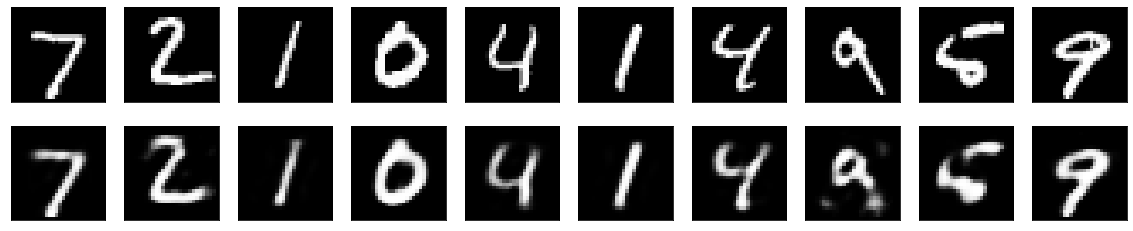

In [33]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep Auto-encoder

In [35]:
input_img = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [36]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 14ms/step - loss: 0.2469 - val_loss: 0.1688
Epoch 2/100
235/235 [==============================] - 2s 11ms/step - loss: 0.1533 - val_loss: 0.1396
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1332 - val_loss: 0.1262
Epoch 4/100
235/235 [==============================] - 2s 11ms/step - loss: 0.1242 - val_loss: 0.1192
Epoch 5/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1181 - val_loss: 0.1142
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1130 - val_loss: 0.1101
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1096 - val_loss: 0.1079
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1069 - val_loss: 0.1046
Epoch 9/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1048 - val_loss: 0.1028
Epoch 10/100
235/235 [==============================] - 3s 12ms/step - loss: 0.102

In [38]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)

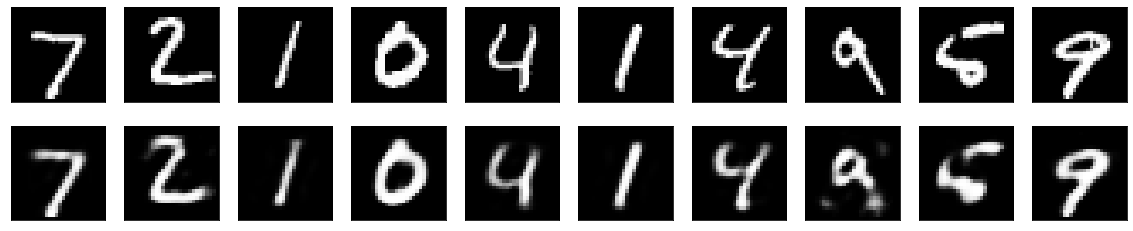

In [39]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()